In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from astropy.io import fits
import numpy as np
from tqdm import tqdm

In [2]:
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

In [3]:
# Set the path to your images
image_directory = '/Users/davidchemaly/Data/DSS2_Survey/A3D_Catalogue/fits_r_fov10Re/'
output_pdf_directory = './'

image_files = [f.split('.')[0] for f in os.listdir(image_directory) if f.endswith('.fits')]

In [4]:
stars_in_fov = np.loadtxt('stars_in_fov.txt', dtype=str)
artifact_in_fov = np.loadtxt('artifact_in_fov.txt', dtype=str)
remove_im = np.concatenate((stars_in_fov, artifact_in_fov))
keep_im = np.setdiff1d(image_files, remove_im)
np.savetxt('keep_im.txt', keep_im, fmt='%s')
np.savetxt('remove_im.txt', remove_im, fmt='%s')


In [9]:
# Ensure the output directory exists
output_pdf_name = 'good_r_10Re.pdf'
plot_image = keep_im.copy() #sort()
os.makedirs(output_pdf_directory, exist_ok=True)
output_pdf_path = os.path.join(output_pdf_directory, output_pdf_name)

# Get all .png files from the directory
# image_files = [f for f in os.listdir(image_directory) if f.endswith('.png')]
# image_files = [f for f in os.listdir(image_directory) if f.endswith('.fits')]

# Set up PDF writer
with PdfPages(output_pdf_path) as pdf:

    # Iterate over images in chunks of 25 (5x5)
    for i in range(0, len(plot_image), 25):
        fig, axs = plt.subplots(5, 5, figsize=(15, 15))

        # Flatten axs array and iterate over it and the images simultaneously
        for ax, j in zip(axs.flatten(), range(i, min(i+25, len(plot_image)))):

            # # From .png
            # img_path = os.path.join(image_directory, plot_image[j] + '.png')
            # img = plt.imread(img_path)
            # ax.imshow(img)

            # From .fits
            img_path = os.path.join(image_directory, plot_image[j] + '.fits')
            with fits.open(img_path) as hdul:
                data   = hdul[0].data
            arcsinh_im = np.arcsinh(data + data.mean())
            c = 2
            p1 = np.percentile(arcsinh_im, c)
            p2 = np.percentile(arcsinh_im, 100)
            ax.imshow(np.clip(arcsinh_im,p1,p2), cmap='gray_r')

            ax.set_title(plot_image[j].split('.')[0])
            ax.axis('off')

        # Fill remaining subplots (if any) with white color
        for k in range(j+1, i+25):
            axs.flatten()[k-i].axis('off')

        # Save the current plot to the PDF
        pdf.savefig(fig)
        plt.close(fig)

print(f"PDF created successfully: {output_pdf_path}")


PDF created successfully: ./good_r_10Re.pdf


  0%|          | 0/266 [00:00<?, ?it/s]

100%|██████████| 266/266 [06:17<00:00,  1.42s/it]


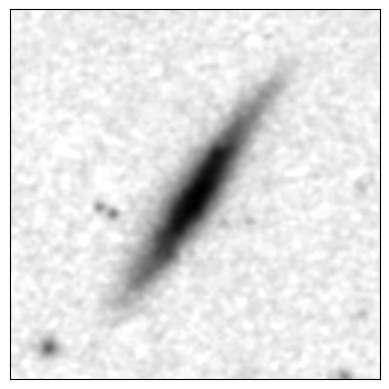

In [7]:
### Save r band as PNG in Folder ###

output_folder_directory = './PNG_use'
os.makedirs(output_folder_directory, exist_ok=True)


# Iterate over images in chunks of 25 (5x5)
plot_image = keep_im.copy() #sort()
for i in tqdm(range(len(plot_image))[550:]):
    # From .fits
    img_path = os.path.join(image_directory, plot_image[i] + '.fits')
    with fits.open(img_path) as hdul:
        data   = hdul[0].data
    arcsinh_im = np.arcsinh(data + data.mean())
    c = 2
    p1 = np.percentile(arcsinh_im, c)
    p2 = np.percentile(arcsinh_im, 100)
    fig = plt.imshow(np.clip(arcsinh_im,p1,p2), cmap='gray_r')
    # Save the current plot to the PDF
    plt.savefig(f"{output_folder_directory}/{plot_image[i].split('.')[0]}.png")

In [16]:
keep_im.shape

(816,)